In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('tulis.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
img_clahe = cv2.merge((l_clahe, a, b))
img_contrast = cv2.cvtColor(img_clahe, cv2.COLOR_LAB2BGR)
img_contrast_rgb = cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB)


In [2]:
def show_image_and_hist(image, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Citra - {title}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(f'Histogram - {title}')
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Piksel')
    plt.grid()
    plt.tight_layout()
    plt.show()

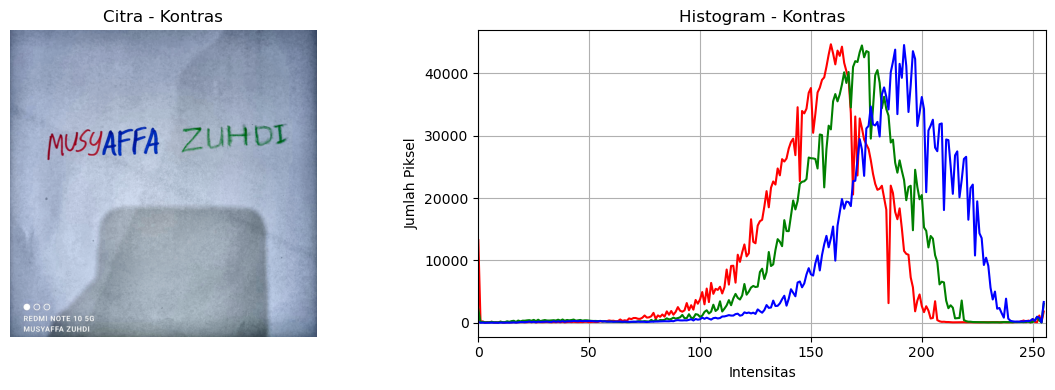

In [3]:
show_image_and_hist(img_contrast_rgb, 'Kontras')

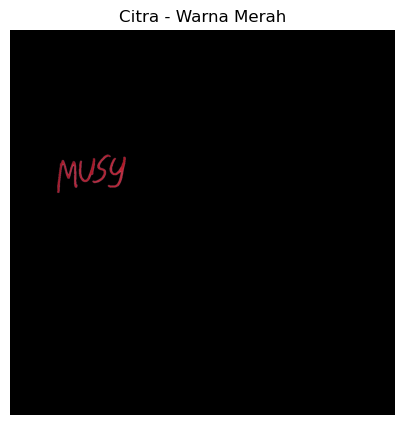

In [4]:
def show_image_only(image, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'Citra - {title}')
    plt.axis('off')
    plt.show()
    
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2

red_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

show_image_only(red_result, 'Warna Merah')

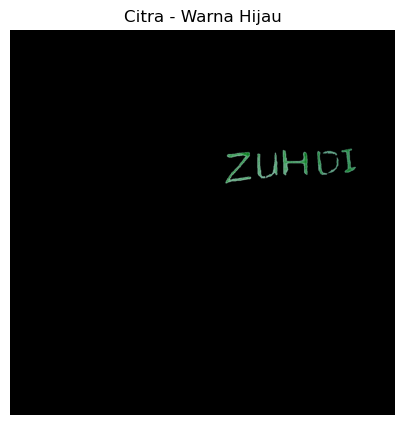

In [5]:
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

green_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)

show_image_only(green_result, 'Warna Hijau')

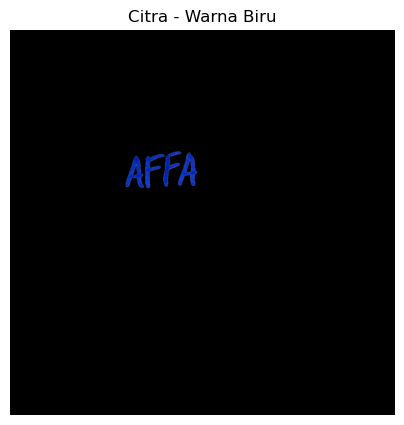

In [6]:
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

blue_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_blue)

show_image_only(blue_result, 'Warna Biru')